In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
n_colors = 3
gem = np.asarray(Image.open("./gem.jpeg"))
#Transform pixel RGB information to “normalized (r, g) space”
gem = np.asarray([gem[:,:,0]/np.sum(gem,axis=2),gem[:,:,1]/np.sum(gem,axis=2)])
gem_shape = gem.shape

In [3]:
gem = gem.T.reshape(gem_shape[2]*gem_shape[1],gem_shape[0])
kmeans = KMeans(n_clusters=n_colors,random_state=0).fit(gem)

In [4]:
gem_n_colors = [[] for i in range(gem_shape[1])]
for i1 in range(gem_shape[1]):
    for i2 in range(gem_shape[2]):
        if kmeans.labels_[i1+i2*896] == 0:
            val = [255,0,0]
        elif kmeans.labels_[i1+i2*896] == 1:
            val = [0,255,0]
        else:
            val = [0,0,255]
        gem_n_colors[i1].append(val)

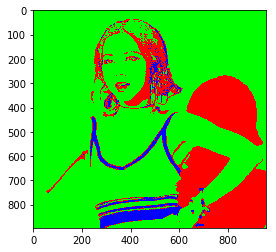

In [5]:
plt.imshow(np.asarray(gem_n_colors,dtype=np.uint8))